In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

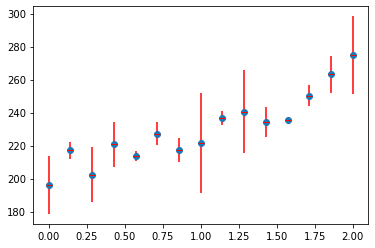

In [2]:
np.load('test_line.npy')
(x,y,error) = np.load('test_line.npy')

sigma=np.var(y)

plt.plot(x,y,'o')
plt.errorbar(x,y,error,color='red', fmt='_')
plt.show()

$\textbf{Con MCMC}$

[193.51777594  31.82673198]


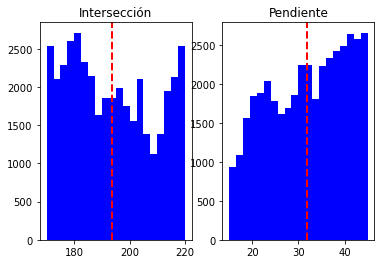

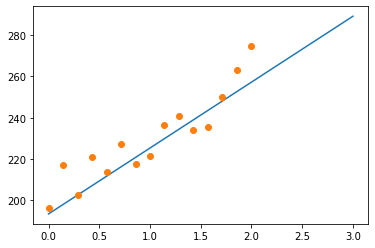

In [12]:
def prior(beta):
    a= beta[0]
    b= beta[1]
    if 170<a<220 and 15<b<45:
        return 0
    return -np.inf

#Para el likelihood, usamos la distribución Gaussiana, como es requerido en el algoritmo metrópolis
#Trabajamos con logaritmos de las cantidades. La intersección de la recta es a, la pendiente es b.
def likelihood(beta):
    a = beta[0]     # intersección
    b = beta[1]     # pendiente
    #El modelo a los que ajustaremos los datos está dado por y_modelo
    y_modelo = a  + b * x
    likelihoods=-0.5*np.sum(np.log(2*np.pi*sigma**2)+(y-y_modelo)**2/(sigma**2))
    return likelihoods

#Formamos el posterior a partir del prior y el likelihood
def posterior(beta):
    return likelihood(beta) + prior(beta)


#Saltamos entre parámetros con una función gaussiana centrada en los parámetros
def funcion(beta):
    a = beta[0]
    b = beta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    beta_new = [a_new, b_new]
    return beta_new

#Ejecutamos el algoritmo
beta_0 = [200, 30]        # valores iniciales de los parámetros
resultados = np.zeros([50000,2])            # arreglo para registrar los resultados
resultados[0,0] = beta_0[0]
resultados[0, 1] = beta_0[1]
for step in range(1, 50000):               #  50000 veces

    beta_old = resultados[step-1, :]
    beta_prop = funcion(beta_old)

    prob = np.exp(posterior(beta_prop) - posterior(beta_old))

    if np.random.uniform(0,1) < prob:
        resultados[step, :] = beta_prop    
    else:
        resultados[step, :] = beta_old         

burn_in = 10000
beta_posterior = resultados[burn_in:, :]
a5=resultados[burn_in:, 0]
b5=resultados[burn_in:, 1]
a6=a5.mean()
b6=b5.mean()
print(beta_posterior.mean(axis=0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.hist(beta_posterior[:,0], bins=20, color='blue')
ax1.axvline(beta_posterior.mean(axis=0)[0], color='red', linestyle='dashed', linewidth=2)
ax1.title.set_text('Intersección')
ax2 = fig.add_subplot(122)
ax2.hist(beta_posterior[:,1], bins=20, color='blue')
ax2.axvline(beta_posterior.mean(axis=0)[1], color='red', linestyle='dashed', linewidth=2)
ax2.title.set_text('Pendiente')
plt.show()


w = np.linspace(0, 3, 3)
plt.plot(w, b6*w+a6)
plt.plot(x,y,'o')
plt.show()

$\textbf{Con minimización de chi cuadrada}$

a =  199.34264283702285
b =  30.762412982452012


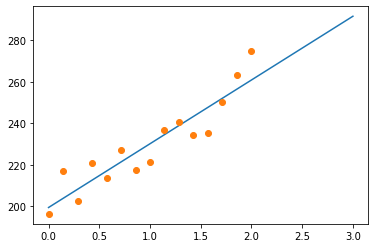

In [14]:
import scipy.optimize as opt
def linea(x,theta):
    a=theta[0]
    b=theta[1]
    return a+b*x

def chi2(theta):
    return np.sum(((y-linea(x,theta))**2)/sigma**2)

inicio=(0,0)
theta=opt.minimize(chi2,inicio)

print('a = ',theta.x[0])
print('b = ',theta.x[1])

z = np.linspace(0, 3, 3)
plt.plot(z, theta.x[1]*z+theta.x[0])
plt.plot(x,y,'o')
plt.show()